# Проведение расчётов и исследований

In [27]:
import pandas as pd
from dython.nominal import associations
import matplotlib.pyplot as plt
import seaborn as sns

### Базовая подготовка датасета к проведению рассчетов

In [28]:
column_names = [
    'year',  # Год
    'season',  # Время года
    'climate',  # Климат
    'city',  # Город
    'country',  # Страна
    'cooling_method',  # Способ охлаждения
    'mixed_cooling_mode',  # Режим при смешанном типе охлаждения
    'heating_method',  # Способ обогрева
    'age',  # Возраст
    'gender',  # Пол
    'temperature_feeling',  # Ощущение температуры
    'temperature_feeling_bool',  # Ощущение температуры (bool)
    'preferred_temperature_change',  # Предпочтительное изменение температуры
    'air_movement_feeling_bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change',  # Предпочтительное изменение движения воздуха
    'comfort_rating',  # Оценка комфорта
    'clothing_insulation',  # Утепление
    'indoor_air_temperature',  # Температура воздуха в помещении
    'outdoor_air_temperature',  # Температура воздуха на улице
    'relative_humidity',  # Относительная влажность (RH)
    'air_speed',  # Скорость воздуха
    'height',  # Рост
    'weight',  # Вес
    'curtains',  # Занавески
    'fan_mode',  # Вентилятор
    'window_status',  # Окно
    'door_status',  # Двери
    'heating_mode',  # Отопление
    'average_monthly_outdoor_temperature',  # Среднемесячная температура на улице
    'number_of_complaints'  # Количество рекламаций
]

column_types = {
    'year': 'int',  # Год (целое число)
    'season': 'category',  # Время года (категориальная переменная: весна, лето и т.д.)
    'climate': 'category',  # Климат (категориальная переменная: названия типов климата)
    'city': 'category',  # Город (категориальная переменная)
    'country': 'category',  # Страна (категориальная переменная)
    'cooling_method': 'category',  # Способ охлаждения (категориальная переменная)
    'mixed_cooling_mode': 'category',  # Режим при смешанном типе охлаждения (категориальная переменная)
    'heating_method': 'category',  # Способ обогрева (категориальная переменная)
    'age': 'int',  # Возраст (целое число)
    'gender': 'category',  # Пол (категориальная переменная: мужской/женский)
    'temperature_feeling': 'float',  # Ощущение температуры (целое число от -3 до +3)
    'temperature_feeling_bool': 'bool',  # Ощущение температуры (bool)
    'preferred_temperature_change': 'category',  # Предпочтительное изменение температуры (категориальная переменная)
    'air_movement_feeling_bool': 'bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change': 'category',  # Предпочтительное изменение движения воздуха (категориальная переменная)
    'comfort_rating': 'int',  # Оценка комфорта (целое число от 1 до 6)
    'clothing_insulation': 'float',  # Утепление (вещественное число, связанный с одеждой фактор)
    'indoor_air_temperature': 'float',  # Температура воздуха в помещении (вещественное число)
    'outdoor_air_temperature': 'float',  # Температура воздуха на улице (вещественное число)
    'relative_humidity': 'float',  # Относительная влажность (вещественное число)
    'air_speed': 'float',  # Скорость воздуха (вещественное число)
    # 'height': 'float',  # Рост (вещественное число)
    # 'weight': 'float',  # Вес (вещественное число)
    'curtains': 'bool',  # Занавески (категориальная переменная: 0 или 1)
    'fan_mode': 'bool',  # Вентилятор (категориальная переменная: 0 или 1)
    'window_status': 'bool',  # Окно (категориальная переменная: 0 или 1)
    'door_status': 'bool',  # Двери (категориальная переменная: 0 или 1)
    'heating_mode': 'bool',  # Отопление (категориальная переменная: 0 или 1)
    'average_monthly_outdoor_temperature': 'float',  # Среднемесячная температура на улице (вещественное число)
    'number_of_complaints': 'int'  # Количество рекламаций (целое число)
}

In [29]:
df = pd.read_csv(
    'data/data.csv',
    sep=';',
    decimal='.',
    header=0,
    names=column_names
)

df.isna().sum()


year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                     147
heating_method                         262
age                                     71
gender                                  72
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool              286
preferred_air_movement_change            0
comfort_rating                         269
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                412
relative_humidity                        0
air_speed                                0
height                                 341
weight                                 270
curtains   

In [30]:
df.shape

(484, 30)

In [31]:
df = pd.read_csv(
    'data/data.csv',
    sep=';',
    decimal='.',
    header=0,
    names=column_names
)

df.to_csv('data/norm_data.csv', index=False)

df = df.drop(['height', 'weight'], axis=1)

df['cooling_method'].fillna("NA")
df['mixed_cooling_mode'].fillna("NA")
df['heating_method'].fillna("NA")

df['comfort_rating'].fillna(3)

for column in df.columns:
    mode_value = df[column].mode()[0] if not df[column].mode().empty else None
    df[column] = df[column].fillna(mode_value)

df = df.astype(column_types)

df = df.drop_duplicates(keep='first')

df.head()

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,...,outdoor_air_temperature,relative_humidity,air_speed,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,22,Мужской,...,22.8,48.9,0.26,True,True,False,False,True,28.9,0
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,40,Мужской,...,23.7,39.2,0.12,False,False,False,False,True,84.0,0
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,42,Мужской,...,24.5,34.7,0.08,False,False,False,False,True,32.8,0
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,27,Мужской,...,23.8,50.0,27.16,True,True,False,False,True,28.9,1
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,46,Мужской,...,24.1,35.8,63.83,True,True,False,False,True,32.8,0


In [32]:
df.dtypes

year                                      int32
season                                 category
climate                                category
city                                   category
country                                category
cooling_method                         category
mixed_cooling_mode                     category
heating_method                         category
age                                       int32
gender                                 category
temperature_feeling                     float64
temperature_feeling_bool                   bool
preferred_temperature_change           category
air_movement_feeling_bool                  bool
preferred_air_movement_change          category
comfort_rating                            int32
clothing_insulation                     float64
indoor_air_temperature                  float64
outdoor_air_temperature                 float64
relative_humidity                       float64
air_speed                               

### Рассчеты

In [33]:
df.head()

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,...,outdoor_air_temperature,relative_humidity,air_speed,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,22,Мужской,...,22.8,48.9,0.26,True,True,False,False,True,28.9,0
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,40,Мужской,...,23.7,39.2,0.12,False,False,False,False,True,84.0,0
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,42,Мужской,...,24.5,34.7,0.08,False,False,False,False,True,32.8,0
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,27,Мужской,...,23.8,50.0,27.16,True,True,False,False,True,28.9,1
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,46,Мужской,...,24.1,35.8,63.83,True,True,False,False,True,32.8,0


Создать дополнительный категориальный столбец, который покажет количество рекламаций по каждому клиенту отдельно: мало (≤1), средне (=2), много (>2).

In [34]:
df['complaints_cat'] = ['few' if x <= 1 else 'medium' if x == 2 else "many" for x in df['number_of_complaints']]
df['complaints_cat'] = df['complaints_cat'].astype('category')

df[['number_of_complaints', 'complaints_cat']].sample(5)

,number_of_complaints,complaints_cat
115,0,few
221,0,few
223,0,few
370,0,few
462,0,few


Рассчитать средний возраст респондентов по полу и стране

In [35]:
tmp = df[['gender', 'age', 'country']].copy()
mean_age_df = tmp.groupby(['gender', 'country'], observed=False).mean().copy()

mean_age_df.rename(columns={
    'age': 'age_mean',
}, inplace=True)

mean_age_df.to_csv('data/mean_age.csv')

mean_age_df

age_mean
gender  country             
Женский Австралия  46.348315
        Индия      39.477612
        США              NaN
Мужской Австралия  42.614679
        Индия      40.448276
        США        36.208333

In [36]:
df.query('gender == "Женский" and country == "США"') # WTF

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,...,relative_humidity,air_speed,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints,complaints_cat


Добавить категориальный столбец, разделив респондентов на три категории по возрасту: до 44 лет - молодой возраст, 45 - 59 лет - средний возраст, 60 лет и больше - пожилой возраст.

In [37]:
df['age_cat'] = ['young_age' if x <= 44 else 'mean_age' if 45 <= x <= 59 else "old_age" for x in df['age']]
df['age_cat'] = df['age_cat'].astype('category')

df[['age', 'age_cat']].sample(5)

,age,age_cat
450,55,mean_age
210,35,young_age
287,35,young_age
167,45,mean_age
289,55,mean_age


Рассчитать среднюю комфортную температуру в зависимости от возрастной категории

In [38]:
tmp = df[['temperature_feeling_bool', 'age_cat', 'indoor_air_temperature', 'outdoor_air_temperature']].copy()
avarage_comf_temp_df = tmp.groupby(['temperature_feeling_bool', 'age_cat'], observed=False).mean()

avarage_comf_temp_df.rename(columns={
    'indoor_air_temperature': 'indoor_air_temperature_mean',
    'outdoor_air_temperature': 'outdoor_air_temperature_mean',
}, inplace=True)

avarage_comf_temp_df.to_csv('data/avarage_comf_temp.csv')

avarage_comf_temp_df

indoor_air_temperature_mean  \
temperature_feeling_bool age_cat                                  
False                    mean_age                     26.517460   
                         old_age                      24.700000   
                         young_age                    27.758333   
True                     mean_age                     25.214433   
                         old_age                      25.400000   
                         young_age                    26.558757   

                                    outdoor_air_temperature_mean  
temperature_feeling_bool age_cat                                  
False                    mean_age                      24.088889  
                         old_age                       24.100000  
                         young_age                     24.163889  
True                     mean_age                      24.104639  
                         old_age                       24.100000  
                         young_age                     24.087571

Рассчитать медианное значение температуры и влажности для каждого типа охлаждения

In [39]:
tmp = df[['cooling_method', 'indoor_air_temperature', 'outdoor_air_temperature', 'relative_humidity']].copy()
median_temp_df = tmp.groupby(['cooling_method'], observed=False).median()

median_temp_df.rename(columns={
    'indoor_air_temperature': 'indoor_air_temperature_median',
    'outdoor_air_temperature': 'outdoor_air_temperature_median',
    'relative_humidity': 'relative_humidity_median'
}, inplace=True)

median_temp_df.to_csv("data/median_temp.csv")

median_temp_df

,indoor_air_temperature_median,outdoor_air_temperature_median,relative_humidity_median
cooling_method,,,
Вентиляция,25.3,24.1,46.30
Кондиционирование,24.4,24.1,42.45
Смешанный,24.6,24.1,56.50


Добавить столбец с процентом удовлетворенных респондентов температурой воздуха в помещении относительно всех респондентов одной страны и одного пола

In [40]:
df['satisfaction_percentage'] = (
    df.groupby(['country', 'gender'], observed=False)['temperature_feeling_bool']
      .transform(lambda x: (x.mean() * 100).round(2))
)

df[['country', 'gender', 'temperature_feeling_bool', 'satisfaction_percentage']].sample(5)

,country,gender,temperature_feeling_bool,satisfaction_percentage
79,Австралия,Мужской,True,88.07
165,Австралия,Мужской,False,88.07
415,Индия,Женский,True,79.10
290,Индия,Женский,False,79.10
175,Австралия,Женский,True,68.54


Составить сводную таблицу, в которой данные будут сгруппированы по стране, полу, возрастной группе и подсчитаны средняя температура воздуха в помещении, на улице и средняя относительная влажность для каждой из этих групп.

In [41]:
tmp = df[['country', 'gender', 'age_cat', 'indoor_air_temperature', 'outdoor_air_temperature', 'relative_humidity']].copy()

summary_df = tmp.groupby(['country', 'gender', 'age_cat'], observed=False).mean()

summary_df.rename(columns={
    'indoor_air_temperature': 'avg_indoor_temp',
    'outdoor_air_temperature': 'avg_outdoor_temp',
    'relative_humidity': 'avg_relative_humidity'
}, inplace=True)

summary_df.to_csv("data/summary.csv")

summary_df

avg_indoor_temp  avg_outdoor_temp  \
country   gender  age_cat                                        
Австралия Женский mean_age         24.112500         24.100000   
                  old_age          24.900000         24.100000   
                  young_age        23.840000         24.100000   
          Мужской mean_age         24.044262         24.100000   
                  old_age          24.733333         24.100000   
                  young_age        24.146667         24.100000   
Индия     Женский mean_age         26.100000         24.100000   
                  old_age                NaN               NaN   
                  young_age        26.151724         24.100000   
          Мужской mean_age         26.764444         24.100000   
                  old_age          29.300000         24.100000   
                  young_age        24.838889         24.100000   
США       Женский mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   
          Мужской mean_age         28.716667         24.116667   
                  old_age                NaN               NaN   
                  young_age        31.965000         24.101667   

                             avg_relative_humidity  
country   gender  age_cat                           
Австралия Женский mean_age               61.266071  
                  old_age                44.550000  
                  young_age              61.368000  
          Мужской mean_age               61.680328  
                  old_age                64.366667  
                  young_age              61.668889  
Индия     Женский mean_age               48.844737  
                  old_age                      NaN  
                  young_age              51.279310  
          Мужской mean_age               49.150000  
                  old_age                78.800000  
                  young_age              52.818519  
США       Женский mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN  
          Мужской mean_age               38.808333  
                  old_age                      NaN  
                  young_age              38.995000

Самостоятельно найти информацию по стандартной комфортной относительной влажности в помещениях (в нашем случае - офисы). Создать новый категориальный столбец, в котором будет показано, удовлетворяет ли зафиксированная относительная влажность стандарту или нет. Категории назначить самостоятельно.

https://airwet.ru/tpost/xogv3ijut1-norma-vlazhnosti-vozduha-v-ofise-dlya-ko

На основе этих данных можно определить следующие категории:

"Комфортная" : влажность в пределах 40–60% .
"Низкая" : влажность ниже 40% .
"Высокая" : влажность выше 60% .

In [42]:
def categorize_humidity(humidity):
    if 40 <= humidity <= 60:
        return 'Комфортная'
    elif humidity < 40:
        return 'Низкая'
    else:
        return 'Высокая'
    
df['humidity_category'] = df['relative_humidity'].apply(categorize_humidity).astype("category")

df[['relative_humidity', 'humidity_category']].sample(5)

,relative_humidity,humidity_category
105,62.2,Высокая
394,49.5,Комфортная
231,72.9,Высокая
359,41.0,Комфортная
19,34.4,Низкая


In [43]:
df.to_csv("data/researched_data.csv")

Исследовать корреляцию между параметрами. Объяснить наиболее коррелирующие параметры, имеет ли это реальный смысл или просто особенность данных?

In [44]:
df.head()

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,...,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints,complaints_cat,age_cat,satisfaction_percentage,humidity_category
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,22,Мужской,...,True,False,False,True,28.9,0,few,young_age,75.0,Комфортная
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,40,Мужской,...,False,False,False,True,84.0,0,few,young_age,75.0,Низкая
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,42,Мужской,...,False,False,False,True,32.8,0,few,young_age,75.0,Низкая
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,27,Мужской,...,True,False,False,True,28.9,1,few,young_age,75.0,Комфортная
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,Кондиционирование,Механическое отопление,46,Мужской,...,True,False,False,True,32.8,0,few,mean_age,75.0,Низкая


In [45]:
df.dtypes

year                                      int32
season                                 category
climate                                category
city                                   category
country                                category
cooling_method                         category
mixed_cooling_mode                     category
heating_method                         category
age                                       int32
gender                                 category
temperature_feeling                     float64
temperature_feeling_bool                   bool
preferred_temperature_change           category
air_movement_feeling_bool                  bool
preferred_air_movement_change          category
comfort_rating                            int32
clothing_insulation                     float64
indoor_air_temperature                  float64
outdoor_air_temperature                 float64
relative_humidity                       float64
air_speed                               

In [46]:
cat_cols = df.columns[(df.dtypes == "category") | (df.dtypes == "bool")].to_list()
cat_cols

['season',
 'climate',
 'city',
 'country',
 'cooling_method',
 'mixed_cooling_mode',
 'heating_method',
 'gender',
 'temperature_feeling_bool',
 'preferred_temperature_change',
 'air_movement_feeling_bool',
 'preferred_air_movement_change',
 'curtains',
 'fan_mode',
 'window_status',
 'door_status',
 'heating_mode',
 'complaints_cat',
 'age_cat',
 'humidity_category']

<Figure size 3000x2500 with 0 Axes>

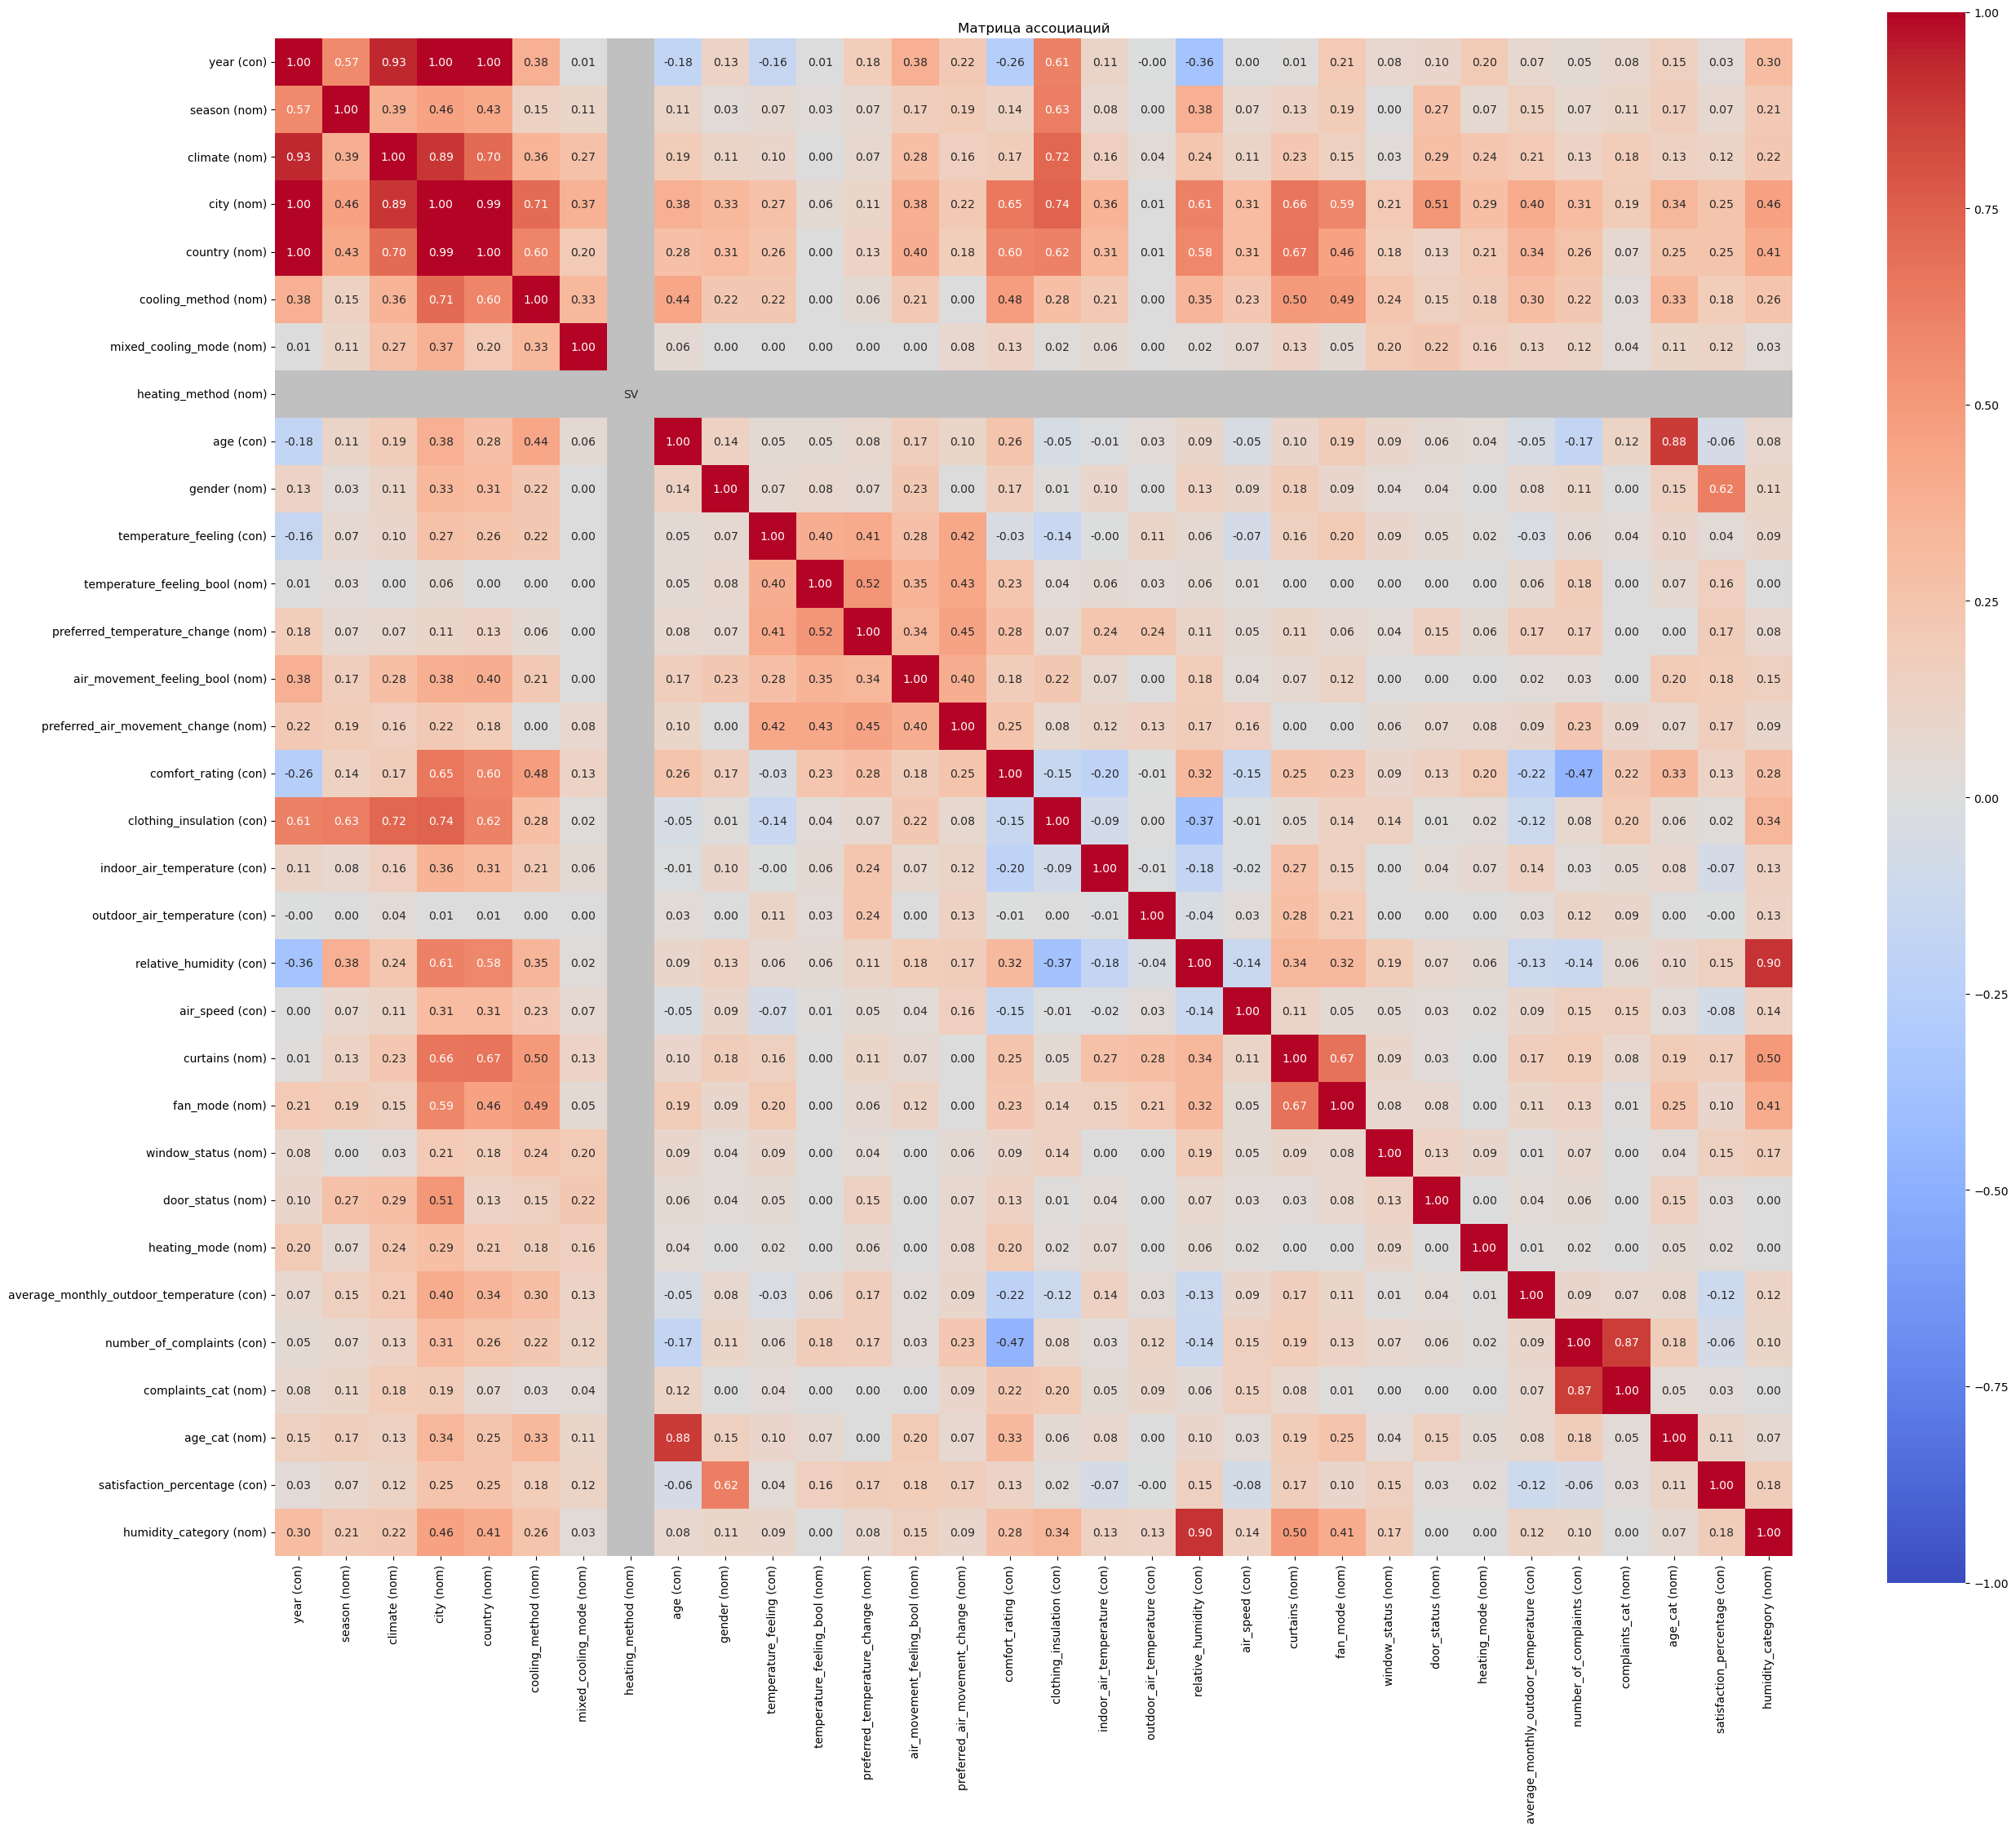

<Figure size 640x480 with 0 Axes>

In [47]:
plt.figure(figsize=(30, 25))
assoc_plot = associations(
    df,
    nominal_columns=cat_cols,
    mark_columns=True,
    figsize=(30, 25),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    title="Матрица ассоциаций"
)

plt.tight_layout()

plt.show()

Выводы будут скоро